In [4]:
import os
import config
import argparse
import numpy as np
import tensorflow as tf
from yolo_predict import yolo_predictor
from PIL import Image, ImageFont, ImageDraw
from utils import letterbox_image, load_weights
os.environ["CUDA_VISIBLE_DEVICES"] = '3'

In [5]:
tf.enable_eager_execution()

In [6]:
image_path = '1.jpg'

In [7]:
image = Image.open(image_path)
resize_image = letterbox_image(image, (416, 416))
image_data = np.array(resize_image, dtype = np.float32)
image_data /= 255.
image_data = np.expand_dims(image_data, axis = 0)

In [8]:
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline

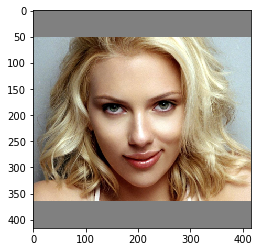

In [10]:
plt.imshow(image_data[0])

In [11]:
predictor = yolo_predictor(config.obj_threshold, config.nms_threshold, config.classes_path, config.anchors_path)

In [12]:
boxes, scores, classes = predictor.predict(tf.convert_to_tensor(image_data), [image.size[1], image.size[0]])

Instructions for updating:
Use `argmax` instead


InvalidArgumentError: Expected dimension in the range [-1, 1), but got 1 [Op:ArgMax]

In [ ]:
boxes.shape

In [ ]:
saver = tf.train.Saver(tf.trainable_variables())

In [ ]:
saver.restore(tf.get_default_session(), 'test_model/affectnet_001_class_softmax/model.ckpt-99700')

In [1]:
import os
import config
import random
import colorsys
import numpy as np
import tensorflow as tf
from model.yolo3_model import yolo

In [2]:
model = yolo(config.norm_epsilon, config.norm_decay, config.anchors_path, config.classes_path, pre_train = False)

In [13]:
output = model.yolo_inference(tf.convert_to_tensor(image_data), config.num_anchors // 3, config.num_classes, training = False)

In [14]:
yolo_outputs = output

In [15]:
output[2].shape

TensorShape([Dimension(1), Dimension(52), Dimension(52), Dimension(24)])

In [16]:
image_shape = [image.size[1], image.size[0]]

In [17]:
max_boxes = 20

In [18]:
        anchor_mask = [[6, 7, 8], [3, 4, 5], [0, 1, 2]]
        boxes = []
        box_scores = []
        input_shape = tf.shape(yolo_outputs[0])[1 : 3] * 32

In [19]:
class_names = predictor._get_class()

In [20]:
for i in range(len(yolo_outputs)):
    _boxes, _box_scores = predictor.boxes_and_scores(yolo_outputs[i], predictor.anchors[anchor_mask[i]], len(class_names), input_shape, image_shape)
    boxes.append(_boxes)
    box_scores.append(_box_scores)

In [21]:
_box_scores[0]

<tf.Tensor: id=11469, shape=(3,), dtype=float32, numpy=array([0.16361563, 0.16719781, 0.1624928 ], dtype=float32)>

In [22]:
boxes = tf.concat(boxes, axis = 0)

In [23]:
boxes.shape

TensorShape([Dimension(10647), Dimension(4)])

In [24]:
box_scores = tf.concat(box_scores, axis = 0)

In [50]:
box_scores[0]

<tf.Tensor: id=11510, shape=(3,), dtype=float32, numpy=array([0.16636774, 0.17689534, 0.1579768 ], dtype=float32)>

In [37]:
mask = box_scores >= 0.17

In [52]:
box_scores_max = tf.reduce_max(box_scores, axis = -1)

In [53]:
box_scores_max

<tf.Tensor: id=11515, shape=(10647,), dtype=float32, numpy=
array([0.17689534, 0.16830759, 0.17468807, ..., 0.16897902, 0.16688465,
       0.17182878], dtype=float32)>

In [57]:
classes = tf.argmax(box_scores_max, dimension=-1)

In [58]:
classes

<tf.Tensor: id=11523, shape=(), dtype=int64, numpy=226>

In [38]:
mask

<tf.Tensor: id=11500, shape=(10647, 3), dtype=bool, numpy=
array([[False,  True, False],
       [False, False, False],
       [False,  True,  True],
       ...,
       [False, False, False],
       [False, False, False],
       [False, False,  True]])>

In [32]:
np.where(mask.numpy == True)

(array([], dtype=int64),)

In [ ]:
max_boxes_tensor = tf.constant(max_boxes, dtype = tf.int32)

In [ ]:
        boxes_ = []
        scores_ = []
        classes_ = []

In [39]:
classes = tf.arg_max(box_scores, dimension=-1)

In [42]:
a = classes.numpy()

In [49]:
len(np.where(a>1)[0])

3663

In [ ]:
class_boxes = tf.boolean_mask(boxes, mask[:, c])
class_box_scores = tf.boolean_mask(box_scores[:, c], mask[:, c])
nms_index = tf.image.non_max_suppression(class_boxes, class_box_scores, max_boxes_tensor, iou_threshold = self.nms_threshold)
class_boxes = tf.gather(class_boxes, nms_index)
class_box_scores = tf.gather(class_box_scores, nms_index)
classes = tf.ones_like(class_box_scores, 'int32') * c
boxes_.append(class_boxes)
scores_.append(class_box_scores)
classes_.append(classes)

In [ ]:
class_boxes = tf.boolean_mask(boxes, mask[:])

In [ ]:
box_scores_max  = tf.reduce_max(box_scores, axis=-1)

In [ ]:
box_scores_max

In [ ]:
box_scores = tf.reduce_max(box_scores, axis = -1)

In [ ]:
mask = box_scores >= config.obj_threshold

In [ ]:
mask

In [ ]:
class_boxes = tf.boolean_mask(boxes, mask)

In [ ]:
classes.shape

In [ ]:
class_boxes = tf.boolean_mask(boxes, mask)
class_box_scores = tf.boolean_mask(box_scores, mask)
nms_index = tf.image.non_max_suppression(class_boxes, class_box_scores, max_boxes_tensor, iou_threshold = 0.1)

In [ ]:
nms_index

In [ ]:
classes = tf.gather(classes, nms_index)

In [ ]:
classes

In [ ]:
output[0].shape

In [ ]:
class_boxes.shape